In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v3.pickle'
TRACKS_DST = 'cache/tracks_v3.pickle'
WORMS_DST = 'cache/worms_v3.pickle'
ARTIFACTS_DST = 'cache/artifacts_v3.pickle'

DOTS_AC = 'cache/dots_v3.h5'
TRACKS_AC = 'cache/tracks_v3.h5'
WORMS_AC = 'cache/worms_v3.h5'
ARTIFACTS_AC = 'cache/artifacts_v3.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder(64)
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
1290/1290 [==============================] - 19s 13ms/step - loss: 0.0063 - accuracy: 0.9669 - val_loss: 4.4866e-04 - val_accuracy: 0.9722
Epoch 2/200
1290/1290 [==============================] - 16s 13ms/step - loss: 1.3465e-04 - accuracy: 0.9708 - val_loss: 3.0362e-04 - val_accuracy: 0.9722
Epoch 3/200
1290/1290 [==============================] - 17s 13ms/step - loss: 7.3276e-05 - accuracy: 0.9708 - val_loss: 1.6934e-04 - val_accuracy: 0.9722
Epoch 4/200
1290/1290 [==============================] - 17s 13ms/step - loss: 4.4860e-05 - accuracy: 0.9708 - val_loss: 6.3251e-05 - val_accuracy: 0.9722
Epoch 5/200
1290/1290 [==============================] - 17s 13ms/step - loss: 6.4253e-05 - accuracy: 0.9708 - val_loss: 3.8507e-05 - val_accuracy: 0.9722
Epoch 6/200
1290/1290 [==============================] - 17s 13ms/step - loss: 2.9402e-05 - accuracy: 0.9708 - val_loss: 8.9015e-05 - val_accuracy: 0.9722
Epoch 

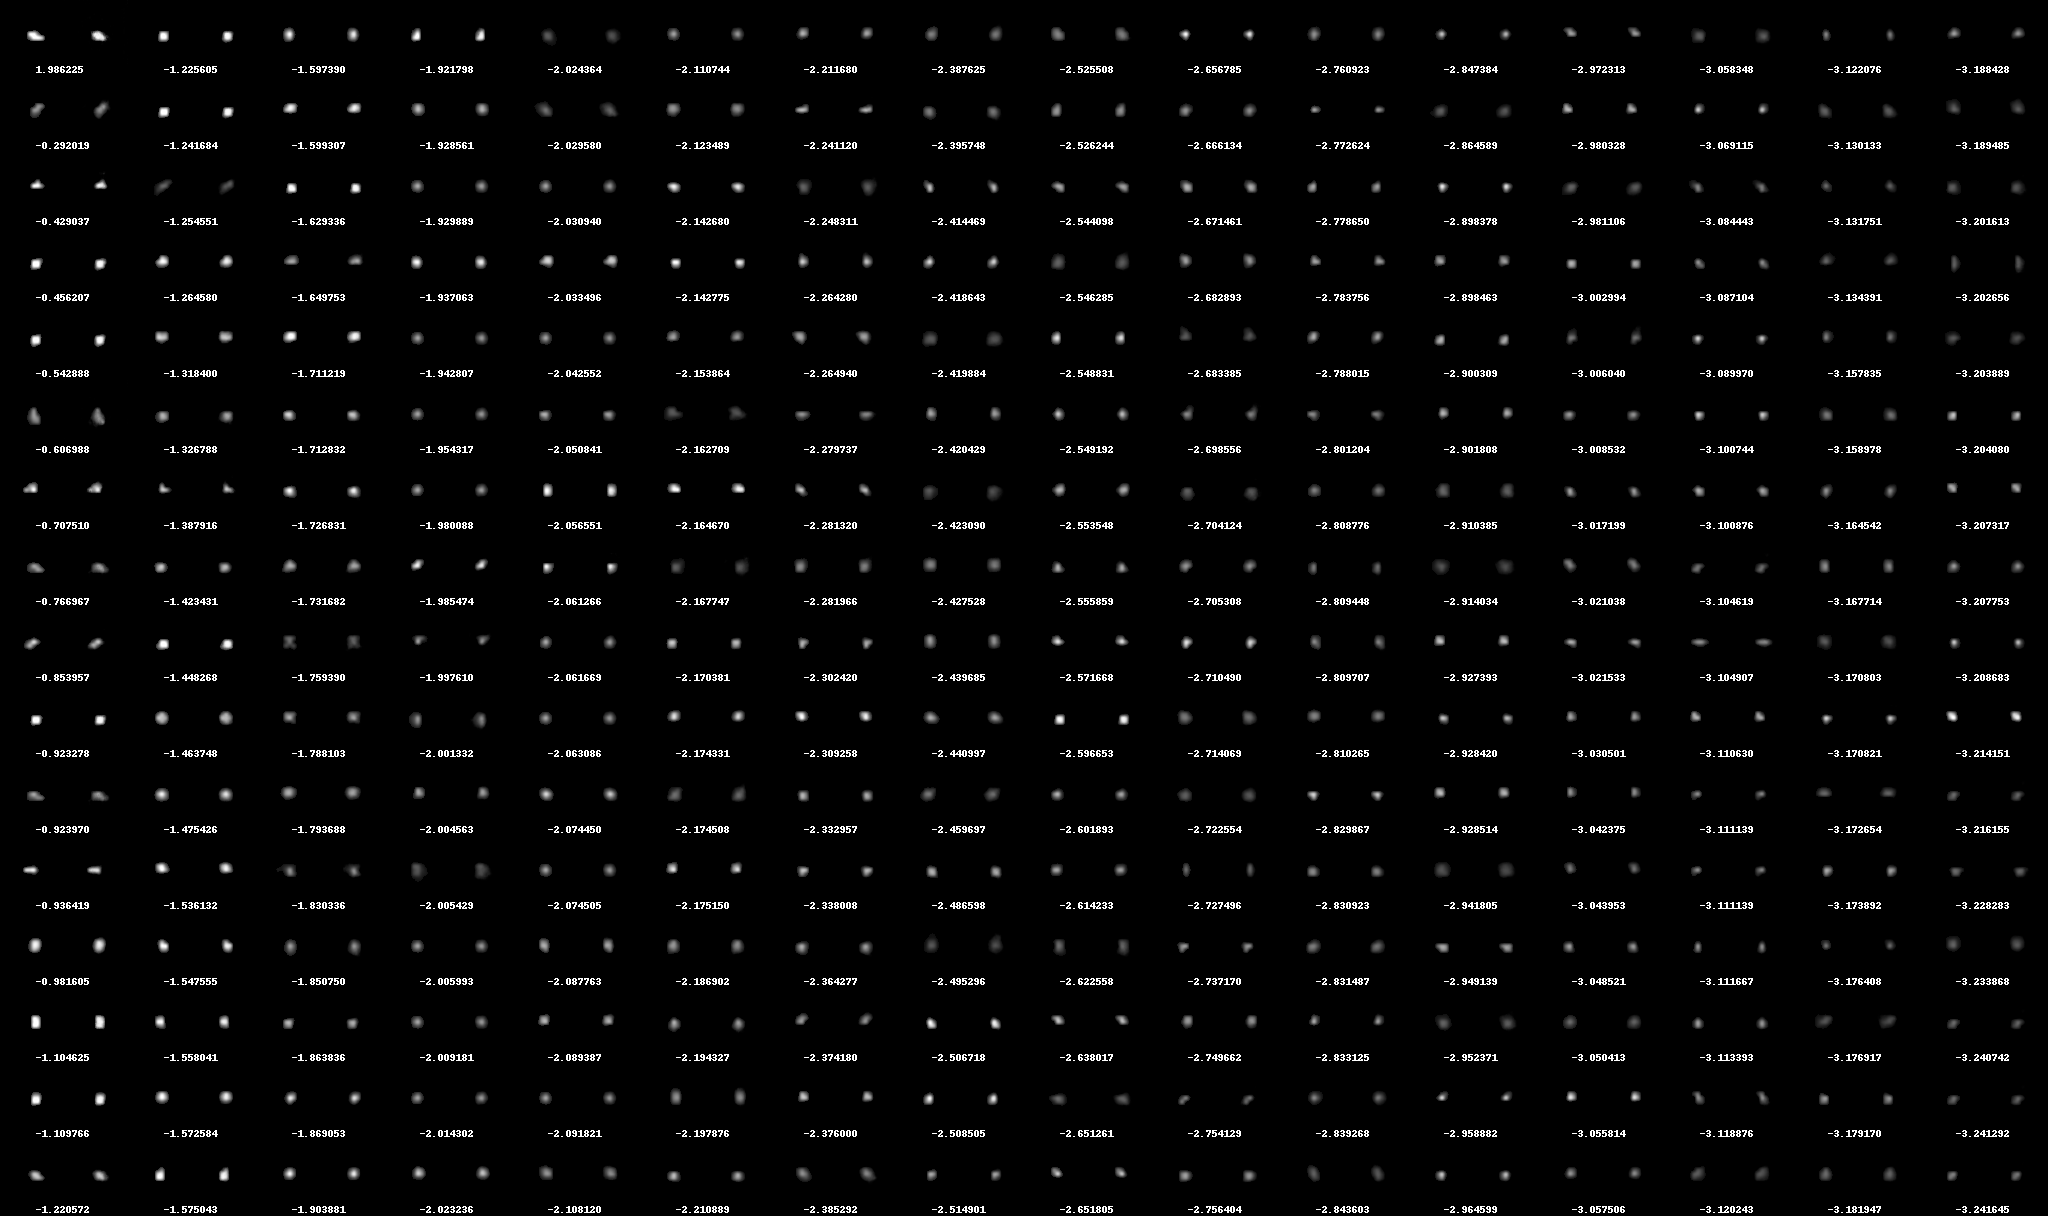

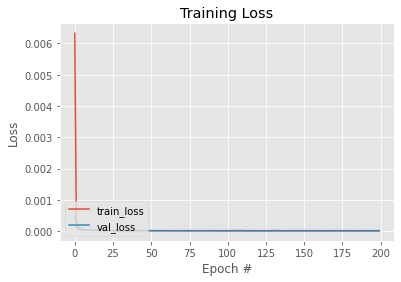

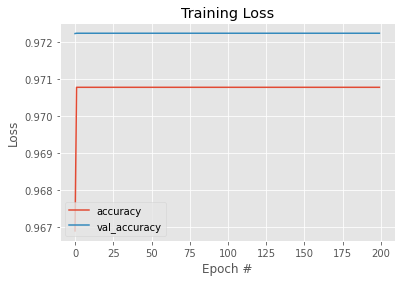

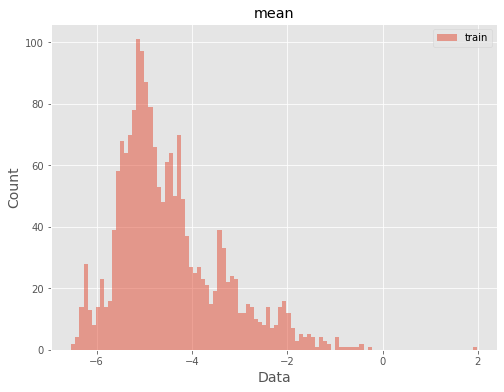

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
2108/2108 [==============================] - 27s 13ms/step - loss: 0.0123 - accuracy: 0.9285 - val_loss: 0.0094 - val_accuracy: 0.9323
Epoch 2/200
2108/2108 [==============================] - 26s 12ms/step - loss: 0.0090 - accuracy: 0.9305 - val_loss: 0.0092 - val_accuracy: 0.9323
Epoch 3/200
2108/2108 [==============================] - 26s 12ms/step - loss: 0.0086 - accuracy: 0.9306 - val_loss: 0.0029 - val_accuracy: 0.9359
Epoch 4/200
2108/2108 [==============================] - 25s 12ms/step - loss: 0.0013 - accuracy: 0.9336 - val_loss: 5.7646e-04 - val_accuracy: 0.9362
Epoch 5/200
2108/2108 [==============================] - 27s 13ms/step - loss: 4.8941e-04 - accuracy: 0.9338 - val_loss: 5.1908e-04 - val_accuracy: 0.9362
Epoch 6/200
2108/2108 [==============================] - 26s 12ms/step - loss: 4.5633e-04 - accuracy: 0.9338 - val_loss: 5.5291e-04 - val_accuracy: 0.9362
Epoch 7/200
2108/2108 [=======

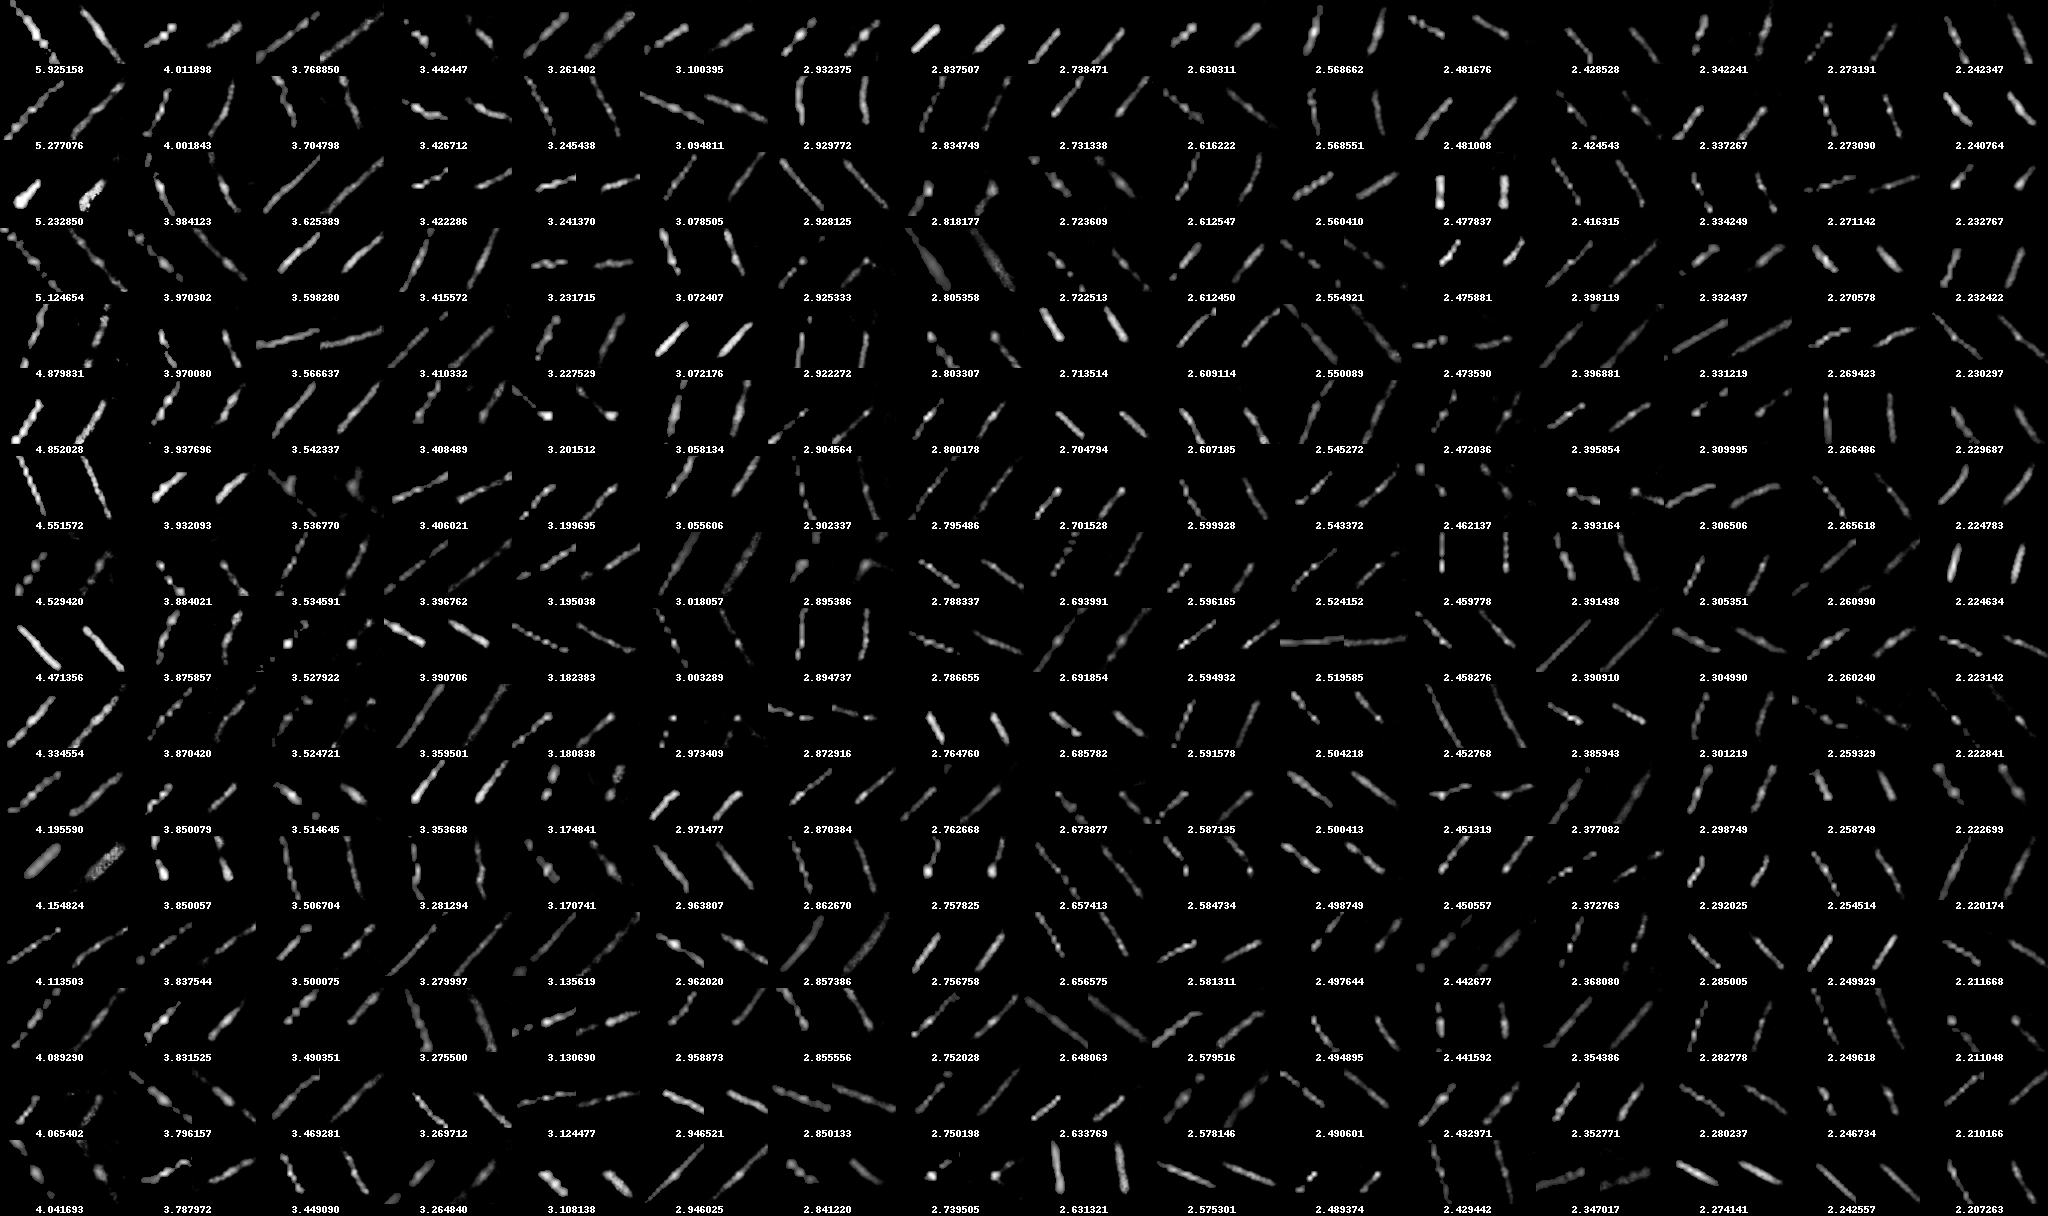

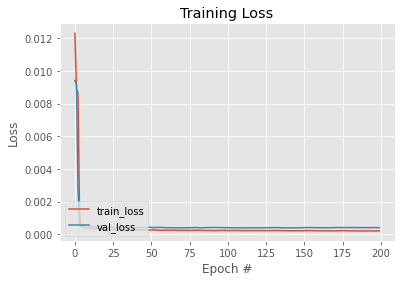

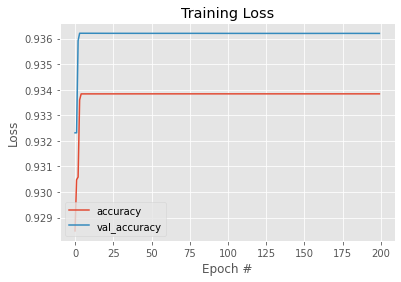

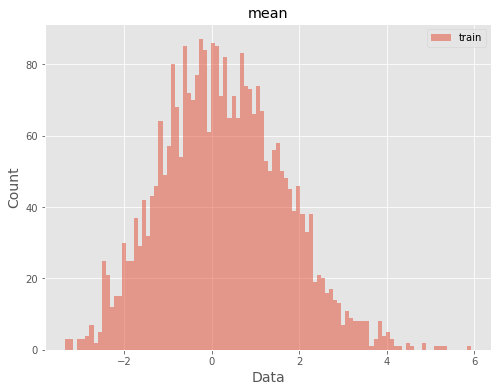

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0391 - accuracy: 0.8885 - val_loss: 0.0318 - val_accuracy: 0.9001
Epoch 2/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0199 - accuracy: 0.9019 - val_loss: 0.0226 - val_accuracy: 0.9024
Epoch 3/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0152 - accuracy: 0.9038 - val_loss: 0.0153 - val_accuracy: 0.9056
Epoch 4/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0128 - accuracy: 0.9046 - val_loss: 0.0148 - val_accuracy: 0.9059
Epoch 5/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0106 - accuracy: 0.9063 - val_loss: 0.0045 - val_accuracy: 0.9150
Epoch 6/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0036 - accuracy: 0.9113 - val_loss: 0.0036 - val_accuracy: 0.9157
Epoch 7/200
341/341 [==============================] - 4s 11ms/step 

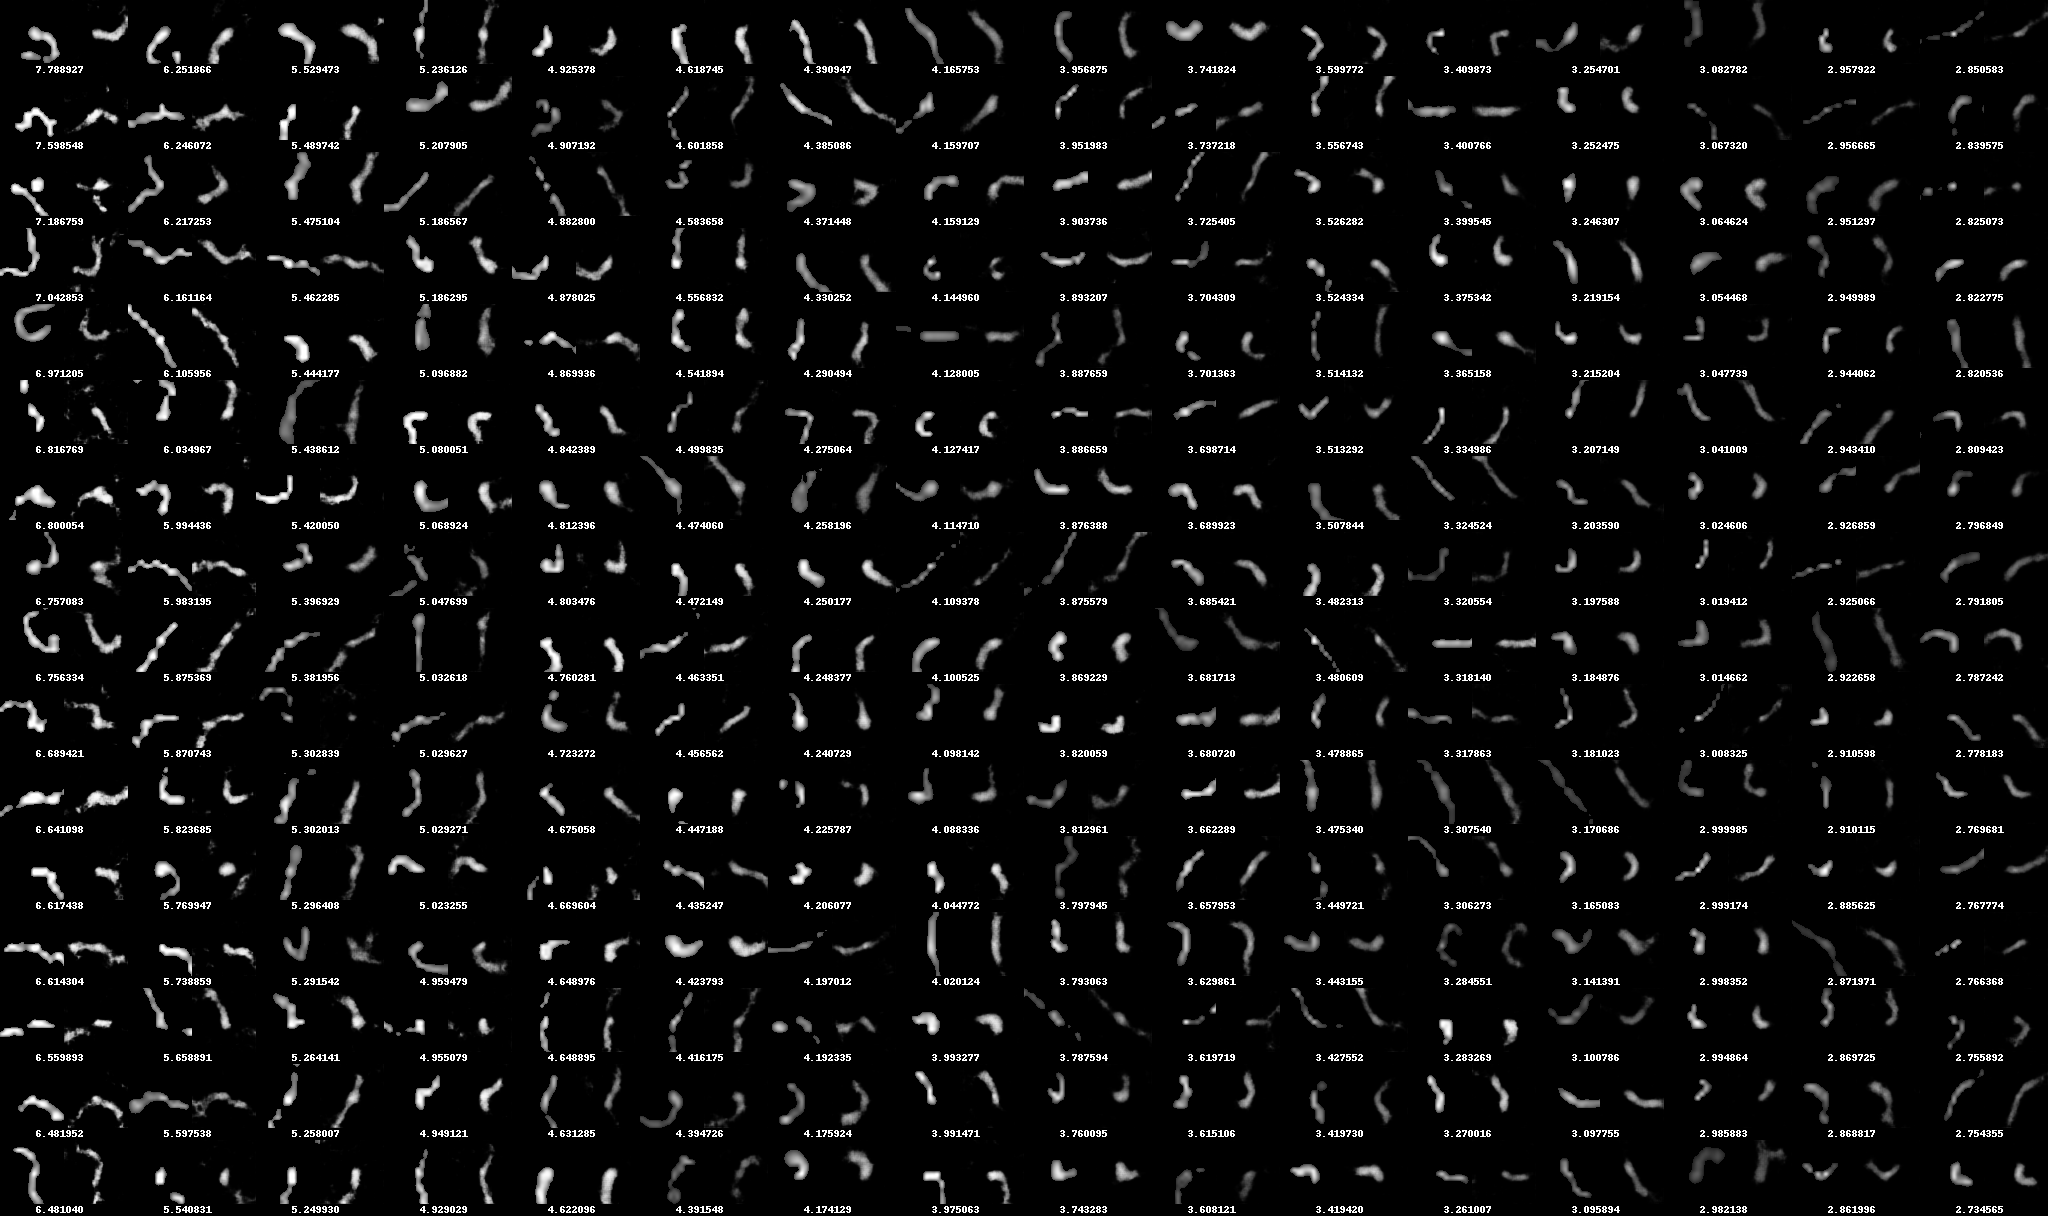

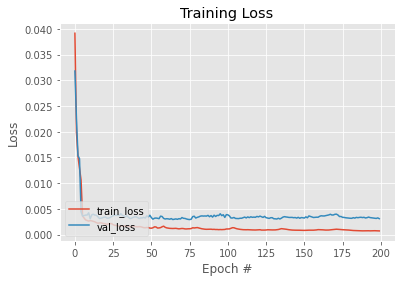

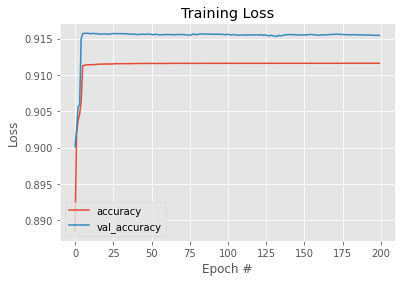

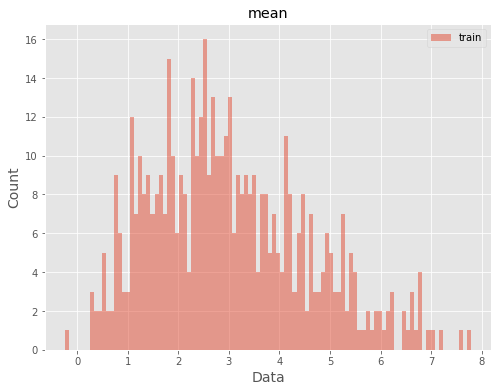

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
445/445 [==============================] - 6s 12ms/step - loss: 0.0294 - accuracy: 0.9257 - val_loss: 0.0068 - val_accuracy: 0.9445
Epoch 2/200
445/445 [==============================] - 5s 12ms/step - loss: 0.0062 - accuracy: 0.9426 - val_loss: 0.0048 - val_accuracy: 0.9457
Epoch 3/200
445/445 [==============================] - 5s 12ms/step - loss: 0.0042 - accuracy: 0.9430 - val_loss: 0.0038 - val_accuracy: 0.9457
Epoch 4/200
445/445 [==============================] - 5s 12ms/step - loss: 0.0031 - accuracy: 0.9430 - val_loss: 0.0024 - val_accuracy: 0.9456
Epoch 5/200
445/445 [==============================] - 5s 12ms/step - loss: 0.0023 - accuracy: 0.9430 - val_loss: 0.0028 - val_accuracy: 0.9457
Epoch 6/200
445/445 [==============================] - 5s 12ms/step - loss: 0.0021 - accuracy: 0.9430 - val_loss: 0.0021 - val_accuracy: 0.9457
Epoch 7/200
445/445 [==============================] - 5s 12ms/step 

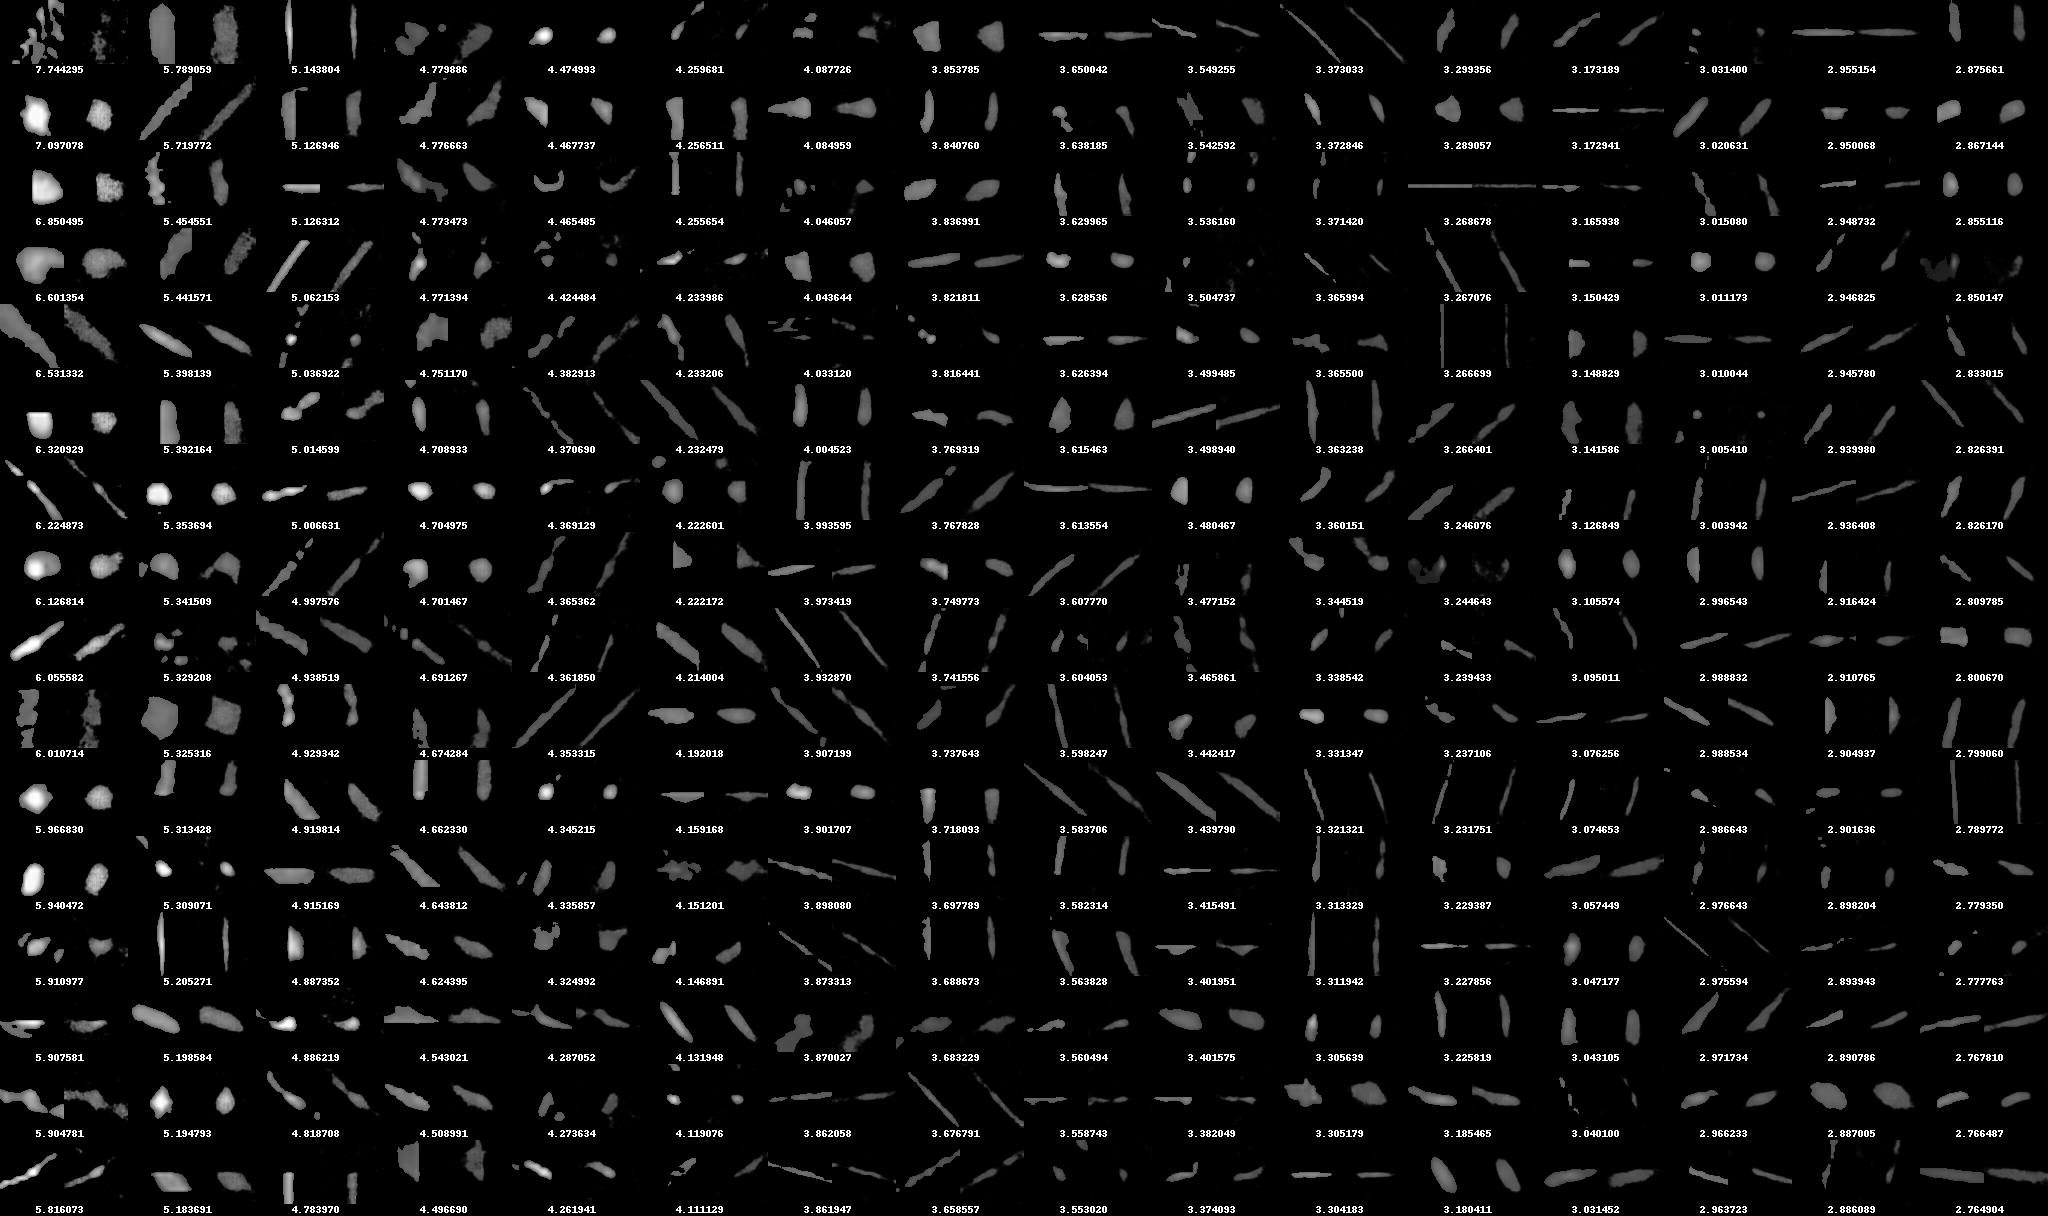

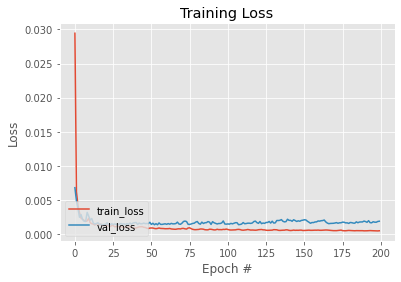

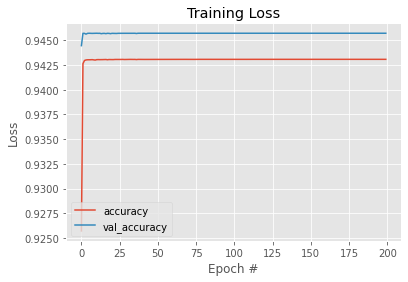

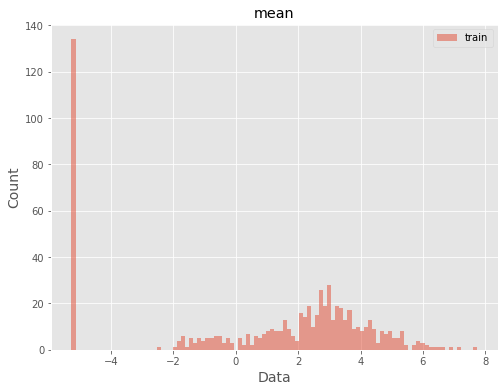

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)